In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Load the Data

In [3]:
data = pd.read_csv('SalaryData_Train.csv')
data.head()

age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            13   United-States   <=50K  
2            0            40   United-States   <=50K  
3            0            40   United-States   <=50K  
4            0            40            Cuba   <=50K

## EDA

In [4]:
#Infoemation of Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
data['Salary'] = data['Salary'].astype('category')
data['Salary'] = data['Salary'].map({' >50K':'>50K' , ' <=50K':'<=50K'})
data.head()

age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek          native Salary  
0            0            40   United-States  <=50K  
1            0            13   United-States  <=50K  
2            0            40   United-States  <=50K  
3            0            40   United-States  <=50K  
4            0            40            Cuba  <=50K

In [6]:
obj = ['workclass', 'education', 'educationno', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex','native', 'Salary']

In [7]:
data['workclass'].value_counts()

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

In [8]:
data['education'].value_counts()

 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64

In [9]:
data['educationno'].value_counts()

9     9840
10    6677
13    5044
14    1627
11    1307
7     1048
12    1008
6      820
4      557
15     542
5      455
8      377
16     375
3      288
2      151
1       45
Name: educationno, dtype: int64

In [10]:
data['maritalstatus'].value_counts()

 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64

In [11]:
data['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1965
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [12]:
data['relationship'].value_counts()

 Husband           12463
 Not-in-family      7726
 Own-child          4466
 Unmarried          3212
 Wife               1406
 Other-relative      888
Name: relationship, dtype: int64

In [13]:
data['race'].value_counts()

 White                 25932
 Black                  2817
 Asian-Pac-Islander      895
 Amer-Indian-Eskimo      286
 Other                   231
Name: race, dtype: int64

In [14]:
data['sex'].value_counts()

 Male      20380
 Female     9781
Name: sex, dtype: int64

In [15]:
data['native'].value_counts()

 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

In [16]:
data['Salary'].value_counts()

<=50K    22653
>50K      7508
Name: Salary, dtype: int64

### Compare different Feature w.r.t. y

In [17]:
def plot_rate_bar(data,col1,col2):
    
    data_col1 = data.groupby([col1])[col2].value_counts(normalize = True).unstack().reset_index()

    fig, axes = plt.subplots(1, 2 ,figsize= (18,4))
    (ax1,ax2) = axes
    colors = ['#768dc5','#e28743']
    ax1.bar(data_col1[col1], data_col1['>50K'], label = '>50K', color= colors[0])
    ax1.bar(data_col1[col1], data_col1['<=50K'], label = '<=50K',bottom= data_col1['>50K'], color= colors[1])
    ax1.set_title('comparision', fontsize= 15)
    ax1.set_xlabel(xlabel= col1, fontsize= 10)
    ax1.set_ylabel(ylabel= col2, fontsize= 10)
    ax1.tick_params(axis='both', labelsize=10)
    ax1.set_xticklabels(list(data_col1[col1]) , rotation=45)
    ax1.legend()

    # Let's put the annotations inside the bars

    for rect in ax1.patches:
        # Find where everything is located
        height = rect.get_height()
        width = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()

        # The width of the bar is also not pixels, it's the
        label_text = '{:.2f}'.format(height)

        label_x = x + width / 2
        label_y = y + height / 2
        ax1.text(label_x, label_y, label_text, ha='center', va='center', fontsize= 8)
        
    sns.countplot(x=col1, data=data,hue=col2 , ax = ax2)
    plt.xticks( rotation = 45, fontsize = 12)

In [18]:
obj

['workclass',
 'education',
 'educationno',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native',
 'Salary']

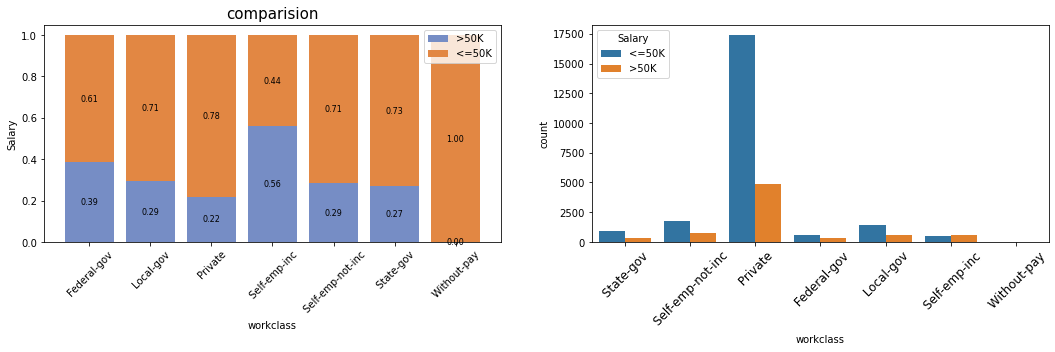

In [19]:
plot_rate_bar(data,'workclass','Salary')

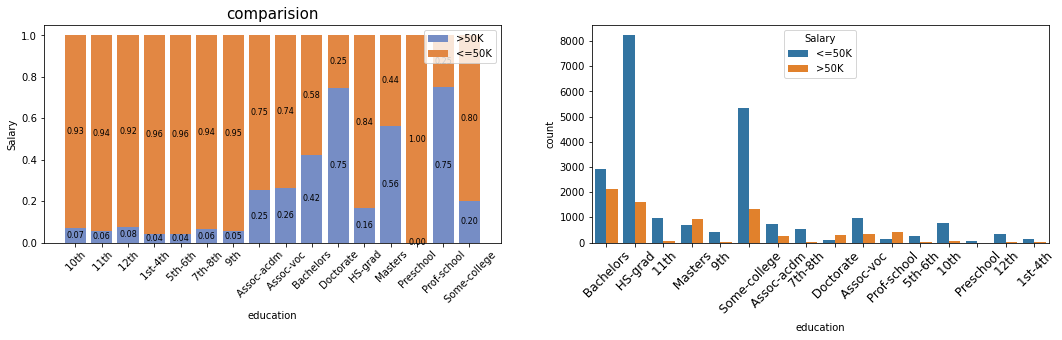

In [20]:
plot_rate_bar(data,'education','Salary')

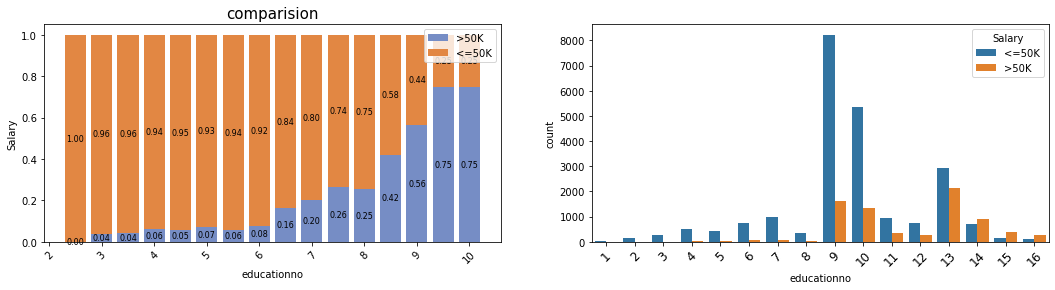

In [21]:
plot_rate_bar(data,'educationno','Salary')

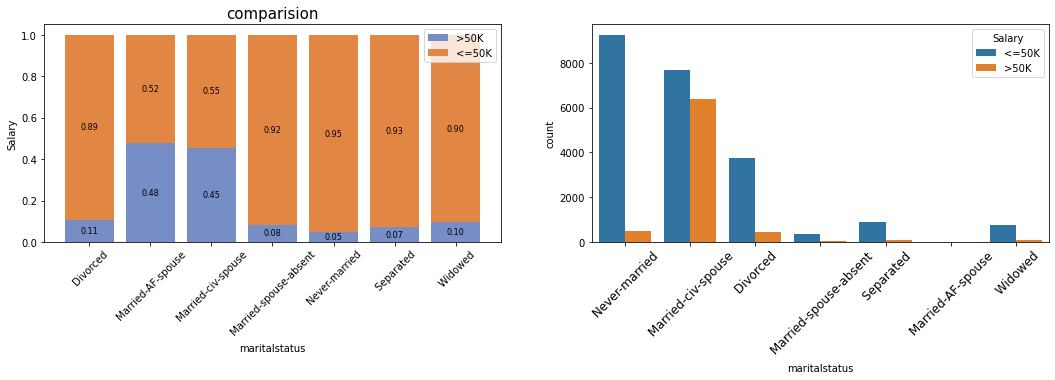

In [22]:
plot_rate_bar(data,'maritalstatus','Salary')

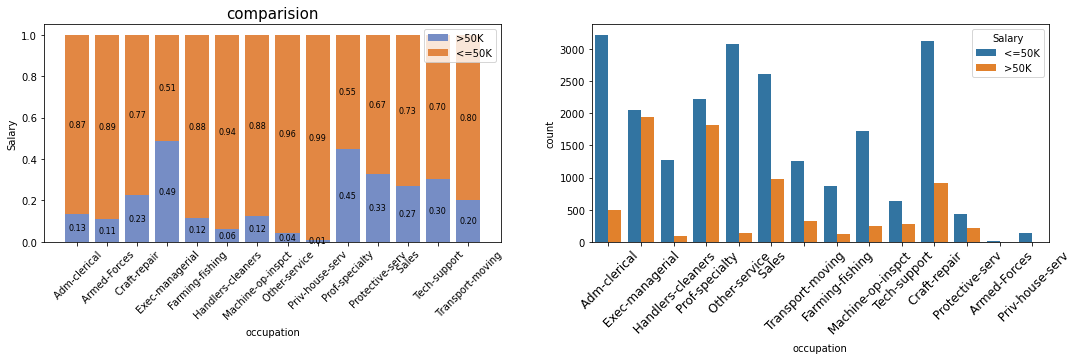

In [23]:
plot_rate_bar(data,'occupation','Salary')

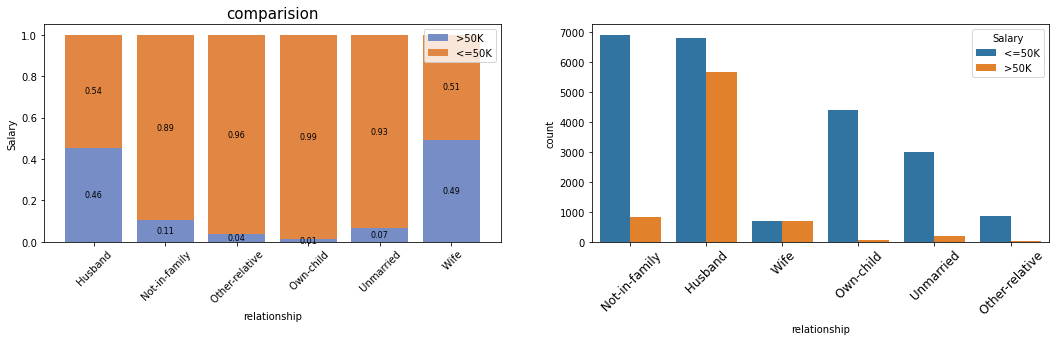

In [24]:
plot_rate_bar(data,'relationship','Salary')

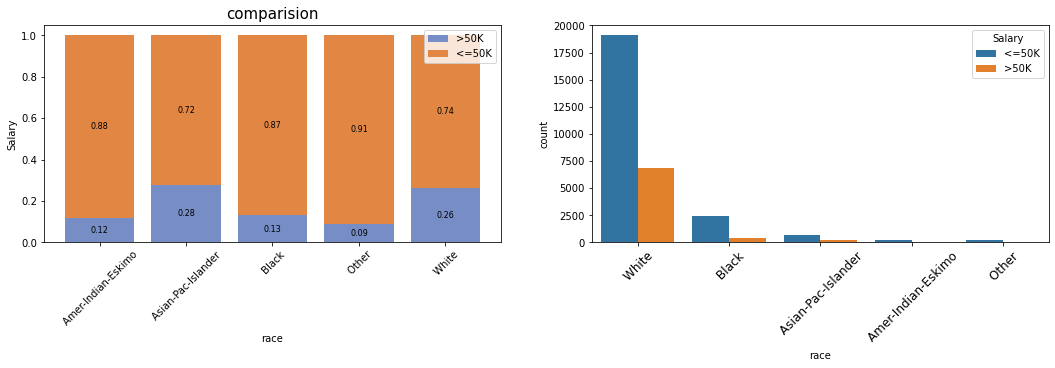

In [25]:
plot_rate_bar(data,'race','Salary')

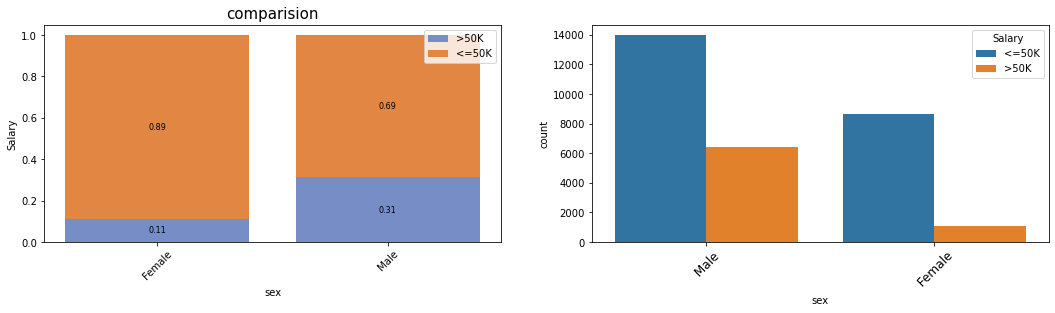

In [26]:
plot_rate_bar(data,'sex','Salary')

In [27]:
# Droping education column because we have no use of that column
data1 = data.drop('education' , axis = 1)
data1 = data1.rename({'educationno':'education'} , axis = 1)
data1.head()

age          workclass  education        maritalstatus          occupation  \
0   39          State-gov         13        Never-married        Adm-clerical   
1   50   Self-emp-not-inc         13   Married-civ-spouse     Exec-managerial   
2   38            Private          9             Divorced   Handlers-cleaners   
3   53            Private          7   Married-civ-spouse   Handlers-cleaners   
4   28            Private         13   Married-civ-spouse      Prof-specialty   

     relationship    race      sex  capitalgain  capitalloss  hoursperweek  \
0   Not-in-family   White     Male         2174            0            40   
1         Husband   White     Male            0            0            13   
2   Not-in-family   White     Male            0            0            40   
3         Husband   Black     Male            0            0            40   
4            Wife   Black   Female            0            0            40   

           native Salary  
0   United-States  <=50K  
1   United-States  <=50K  
2   United-States  <=50K  
3   United-States  <=50K  
4            Cuba  <=50K

## Model Building Using all Columns

### Encoded using Label Encoder

In [28]:
data1.head()

age          workclass  education        maritalstatus          occupation  \
0   39          State-gov         13        Never-married        Adm-clerical   
1   50   Self-emp-not-inc         13   Married-civ-spouse     Exec-managerial   
2   38            Private          9             Divorced   Handlers-cleaners   
3   53            Private          7   Married-civ-spouse   Handlers-cleaners   
4   28            Private         13   Married-civ-spouse      Prof-specialty   

     relationship    race      sex  capitalgain  capitalloss  hoursperweek  \
0   Not-in-family   White     Male         2174            0            40   
1         Husband   White     Male            0            0            13   
2   Not-in-family   White     Male            0            0            40   
3         Husband   Black     Male            0            0            40   
4            Wife   Black   Female            0            0            40   

           native Salary  
0   United-States  <=50K  
1   United-States  <=50K  
2   United-States  <=50K  
3   United-States  <=50K  
4            Cuba  <=50K

In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data1.iloc[:,1] = le.fit_transform(data1.iloc[:,1])
data1.iloc[:,3] = le.fit_transform(data1.iloc[:,3])
data1.iloc[:,4] = le.fit_transform(data1.iloc[:,4])
data1.iloc[:,5] = le.fit_transform(data1.iloc[:,5])
data1.iloc[:,6] = le.fit_transform(data1.iloc[:,6])
data1.iloc[:,7] = le.fit_transform(data1.iloc[:,7])
data1.iloc[:,11] = le.fit_transform(data1.iloc[:,11])
data1.iloc[:,12] = le.fit_transform(data1.iloc[:,12])

In [30]:
data1.head()

age  workclass  education  maritalstatus  occupation  relationship  race  \
0   39          5         13              4           0             1     4   
1   50          4         13              2           3             0     4   
2   38          2          9              0           5             1     4   
3   53          2          7              2           5             0     2   
4   28          2         13              2           9             5     2   

   sex  capitalgain  capitalloss  hoursperweek  native  Salary  
0    1         2174            0            40      37       0  
1    1            0            0            13      37       0  
2    1            0            0            40      37       0  
3    1            0            0            40      37       0  
4    0            0            0            40       4       0

In [31]:
# Correlation Between columns
data1.corr()

age  workclass  education  maritalstatus  occupation  \
age            1.000000   0.080537   0.043525      -0.276363   -0.005682   
workclass      0.080537   1.000000   0.037833      -0.034235    0.015572   
education      0.043525   0.037833   1.000000      -0.063419    0.087717   
maritalstatus -0.276363  -0.034235  -0.063419       1.000000    0.022655   
occupation    -0.005682   0.015572   0.087717       0.022655    1.000000   
relationship  -0.246452  -0.067414  -0.091935       0.177955   -0.053727   
race           0.023380   0.044734   0.032805      -0.068641    0.000717   
sex            0.081972   0.074966   0.006155      -0.119774    0.062316   
capitalgain    0.080152   0.035349   0.124416      -0.042414    0.022162   
capitalloss    0.060278   0.007244   0.079691      -0.035385    0.014612   
hoursperweek   0.101598   0.050723   0.152522      -0.189004    0.018365   
native        -0.001548   0.007598   0.092625      -0.026057   -0.003298   
Salary         0.241991   0.018040   0.335287      -0.193504    0.051577   

               relationship      race       sex  capitalgain  capitalloss  \
age               -0.246452  0.023380  0.081972     0.080152     0.060278   
workclass         -0.067414  0.044734  0.074966     0.035349     0.007244   
education         -0.091935  0.032805  0.006155     0.124416     0.079691   
maritalstatus      0.177955 -0.068641 -0.119774    -0.042414    -0.035385   
occupation        -0.053727  0.000717  0.062316     0.022162     0.014612   
relationship       1.000000 -0.117148 -0.584881    -0.058257    -0.063659   
race              -0.117148  1.000000  0.089207     0.014355     0.023461   
sex               -0.584881  0.089207  1.000000     0.048809     0.047285   
capitalgain       -0.058257  0.014355  0.048809     1.000000    -0.032218   
capitalloss       -0.063659  0.023461  0.047285    -0.032218     1.000000   
hoursperweek      -0.257850  0.048533  0.231272     0.080431     0.052454   
native            -0.010661  0.126507  0.000063     0.008513     0.010193   
Salary            -0.250998  0.071666  0.216680     0.221195     0.150222   

               hoursperweek    native    Salary  
age                0.101598 -0.001548  0.241991  
workclass          0.050723  0.007598  0.018040  
education          0.152522  0.092625  0.335287  
maritalstatus     -0.189004 -0.026057 -0.193504  
occupation         0.018365 -0.003298  0.051577  
relationship      -0.257850 -0.010661 -0.250998  
race               0.048533  0.126507  0.071666  
sex                0.231272  0.000063  0.216680  
capitalgain        0.080431  0.008513  0.221195  
capitalloss        0.052454  0.010193  0.150222  
hoursperweek       1.000000  0.008429  0.229480  
native             0.008429  1.000000  0.023515  
Salary             0.229480  0.023515  1.000000

In [32]:
# Dividing into X and y
X = data1.iloc[:,0:-1]
y = data1.iloc[:,-1]

In [33]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=data1.Salary, random_state = 0)

In [34]:
# Model Building
from sklearn.naive_bayes import CategoricalNB

model = CategoricalNB()

In [35]:
model.fit(X_train , y_train)

CategoricalNB()

In [36]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score , f1_score , precision_score , recall_score ,classification_report

In [38]:
print('Training Accuracy : ', accuracy_score(y_train, y_pred_train))
print('Training F1-Score : ', f1_score(y_train, y_pred_train))
print('Training Precision : ', precision_score(y_train, y_pred_train))
print('Training Recall : ', recall_score(y_train, y_pred_train))

Training Accuracy :  0.8550232095490716
Training F1-Score :  0.6921316669600422
Training Precision :  0.7341299477221808
Training Recall :  0.6546786546786547


In [39]:
print('Testing Accuracy of CategoricalNB: ', accuracy_score(y_test, y_pred_test))
print('Testing F1-Score of CategoricalNB: ', f1_score(y_test, y_pred_test))
print('Training Precision : ', precision_score(y_test, y_pred_test))
print('Training Recall : ', recall_score(y_test, y_pred_test))

Testing Accuracy of CategoricalNB:  0.8539698325874358
Testing F1-Score of CategoricalNB:  0.6852447302608075
Training Precision :  0.7393986121819583
Training Recall :  0.6384820239680427


In [40]:
print('Classification Report for Training Data : \n\n',classification_report(y_train, y_pred_train))

Classification Report for Training Data : 

               precision    recall  f1-score   support

           0       0.89      0.92      0.91     18122
           1       0.73      0.65      0.69      6006

    accuracy                           0.86     24128
   macro avg       0.81      0.79      0.80     24128
weighted avg       0.85      0.86      0.85     24128



In [41]:
print('Classification Report for Testing Data : \n\n',classification_report(y_test, y_pred_test))

Classification Report for Testing Data : 

               precision    recall  f1-score   support

           0       0.89      0.93      0.90      4531
           1       0.74      0.64      0.69      1502

    accuracy                           0.85      6033
   macro avg       0.81      0.78      0.80      6033
weighted avg       0.85      0.85      0.85      6033



## Building Final Model

In [42]:
X_train = X
y_train = y

In [43]:
data1.shape

(30161, 13)

In [44]:
X.shape , y.shape

((30161, 12), (30161,))

### EDA on Testing Data

In [45]:
#Read Test data
data_test = pd.read_csv('SalaryData_Test.csv')
data_test.head()

age   workclass      education  educationno        maritalstatus  \
0   25     Private           11th            7        Never-married   
1   38     Private        HS-grad            9   Married-civ-spouse   
2   28   Local-gov     Assoc-acdm           12   Married-civ-spouse   
3   44     Private   Some-college           10   Married-civ-spouse   
4   34     Private           10th            6        Never-married   

           occupation    relationship    race    sex  capitalgain  \
0   Machine-op-inspct       Own-child   Black   Male            0   
1     Farming-fishing         Husband   White   Male            0   
2     Protective-serv         Husband   White   Male            0   
3   Machine-op-inspct         Husband   Black   Male         7688   
4       Other-service   Not-in-family   White   Male            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            50   United-States   <=50K  
2            0            40   United-States    >50K  
3            0            40   United-States    >50K  
4            0            30   United-States   <=50K

In [46]:
#make changes that we done on training data
data_test = data_test.drop('education' , axis = 1)
data_test = data_test.rename({'educationno':'education'} , axis = 1)
data_test.head()

age   workclass  education        maritalstatus          occupation  \
0   25     Private          7        Never-married   Machine-op-inspct   
1   38     Private          9   Married-civ-spouse     Farming-fishing   
2   28   Local-gov         12   Married-civ-spouse     Protective-serv   
3   44     Private         10   Married-civ-spouse   Machine-op-inspct   
4   34     Private          6        Never-married       Other-service   

     relationship    race    sex  capitalgain  capitalloss  hoursperweek  \
0       Own-child   Black   Male            0            0            40   
1         Husband   White   Male            0            0            50   
2         Husband   White   Male            0            0            40   
3         Husband   Black   Male         7688            0            40   
4   Not-in-family   White   Male            0            0            30   

           native  Salary  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States    >50K  
3   United-States    >50K  
4   United-States   <=50K

In [47]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  int64 
 3   maritalstatus  15060 non-null  object
 4   occupation     15060 non-null  object
 5   relationship   15060 non-null  object
 6   race           15060 non-null  object
 7   sex            15060 non-null  object
 8   capitalgain    15060 non-null  int64 
 9   capitalloss    15060 non-null  int64 
 10  hoursperweek   15060 non-null  int64 
 11  native         15060 non-null  object
 12  Salary         15060 non-null  object
dtypes: int64(5), object(8)
memory usage: 1.5+ MB


#### Encoding of Test Data 

In [48]:
le = LabelEncoder()

data_test.iloc[:,1] = le.fit_transform(data_test.iloc[:,1])
data_test.iloc[:,3] = le.fit_transform(data_test.iloc[:,3])
data_test.iloc[:,4] = le.fit_transform(data_test.iloc[:,4])
data_test.iloc[:,5] = le.fit_transform(data_test.iloc[:,5])
data_test.iloc[:,6] = le.fit_transform(data_test.iloc[:,6])
data_test.iloc[:,7] = le.fit_transform(data_test.iloc[:,7])
data_test.iloc[:,11] = le.fit_transform(data_test.iloc[:,11])
data_test.iloc[:,12] = le.fit_transform(data_test.iloc[:,12])

In [49]:
data_test.head()

age  workclass  education  maritalstatus  occupation  relationship  race  \
0   25          2          7              4           6             3     2   
1   38          2          9              2           4             0     4   
2   28          1         12              2          10             0     4   
3   44          2         10              2           6             0     2   
4   34          2          6              4           7             1     4   

   sex  capitalgain  capitalloss  hoursperweek  native  Salary  
0    1            0            0            40      37       0  
1    1            0            0            50      37       0  
2    1            0            0            40      37       1  
3    1         7688            0            40      37       1  
4    1            0            0            30      37       0

In [50]:
#defining X_test and y_test
X_test = data_test.iloc[:,0:-1]
y_test = data_test.iloc[:,-1]

### Model Building

In [51]:
# Build the Model
final_model = CategoricalNB()

#Train the Model with complete training dataset
final_model.fit(X_train , y_train)

CategoricalNB()

In [52]:
y_pred_train = final_model.predict(X_train)
y_pred_test = final_model.predict(X_test)

In [53]:
print('Training Accuracy : ', accuracy_score(y_train, y_pred_train))
print('Training F1-Score : ', f1_score(y_train, y_pred_train))
print('Training Precision : ', precision_score(y_train, y_pred_train))
print('Training Recall : ', recall_score(y_train, y_pred_train))

Training Accuracy :  0.8550114386127781
Training F1-Score :  0.6949424485524939
Training Precision :  0.7296030467262341
Training Recall :  0.6634256792754395


In [54]:
print('Classification Report for Training Data : \n\n',classification_report(y_train, y_pred_train))

Classification Report for Training Data : 

               precision    recall  f1-score   support

           0       0.89      0.92      0.90     22653
           1       0.73      0.66      0.69      7508

    accuracy                           0.86     30161
   macro avg       0.81      0.79      0.80     30161
weighted avg       0.85      0.86      0.85     30161



In [55]:
print('Testing Accuracy of CategoricalNB: ', accuracy_score(y_test, y_pred_test))
print('Testing F1-Score of CategoricalNB: ', f1_score(y_test, y_pred_test))
print('Training Precision : ', precision_score(y_test, y_pred_test))
print('Training Recall : ', recall_score(y_test, y_pred_test))

Testing Accuracy of CategoricalNB:  0.8537848605577689
Testing F1-Score of CategoricalNB:  0.6895968424020299
Training Precision :  0.7206835592221568
Training Recall :  0.6610810810810811


In [56]:
print('Classification Report for Testing Data : \n\n',classification_report(y_test, y_pred_test))

Classification Report for Testing Data : 

               precision    recall  f1-score   support

           0       0.89      0.92      0.90     11360
           1       0.72      0.66      0.69      3700

    accuracy                           0.85     15060
   macro avg       0.81      0.79      0.80     15060
weighted avg       0.85      0.85      0.85     15060

